In [6]:
import numpy as np

import seaborn as sns
import pandas as pd
import os
import matplotlib.pyplot as plt
import dill
import requests
import xmltodict
import cvxpy as cp
import itertools
from scipy.special import logsumexp
%matplotlib inline
# sns.set(style='darkgrid', palette='viridis', context='talk')

os.chdir(os.path.expanduser('~/dev/vivarium-ecoli'))

from ecoli.processes.metabolism_redux_classic import NetworkFlowModel, FlowResult

# Import simulation output

Before running this, run a sim in ecoli/experiments/metabolism_redux_sim.py with -n 2a to generate a simulation output. This is necessary to replicate the simulation environment. Use the default .json config.

In [2]:
time = '10'
date = '2024-08-07'
experiment = 'metabolism-redux-classic-rich'
entry = f'{experiment}_{time}_{date}'
folder = f'out/cofactors/{entry}/'

In [3]:
output = np.load(folder + '0_output.npy',allow_pickle='TRUE').item()
# output = np.load(r"out/geneRxnVerifData/output_glc.npy", allow_pickle=True, encoding='ASCII').tolist()
output = output['agents']['0']
fba = output['listeners']['fba_results']
mass = output['listeners']['mass']
bulk = pd.DataFrame(output['bulk'])

In [4]:
f = open(folder + 'agent_steps.pkl', 'rb')
agent = dill.load(f)
f.close()

Text(0.5, 1.0, 'Top 10 Fluxes')

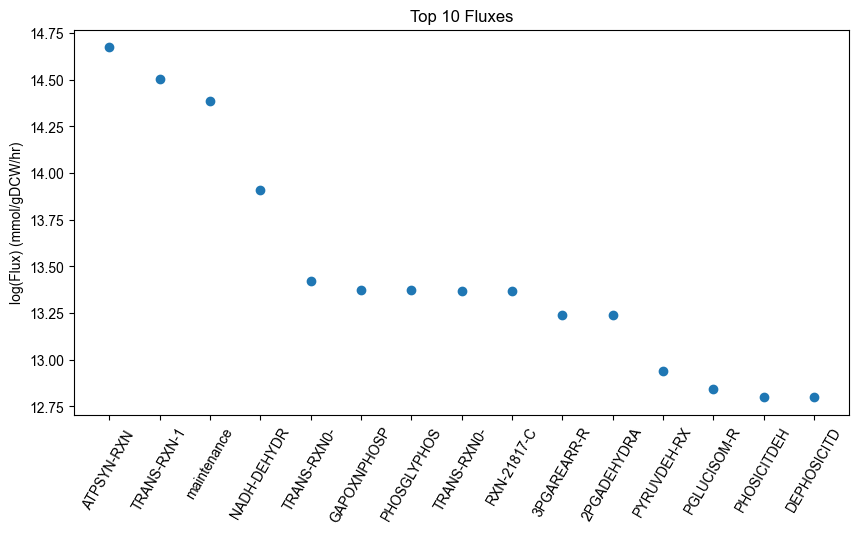

In [8]:
# create simulation flux dataframe
self = agent['ecoli-metabolism-redux-classic'] #self of metabolism_redux_classic class
reaction_names = agent['ecoli-metabolism-redux-classic'].reaction_names

sim_fluxes = pd.DataFrame(fba["estimated_fluxes"])
sim_fluxes.columns = reaction_names
sim_fluxes = sim_fluxes.iloc[1:,] # remove first row (NAs) of the dataframe

# print(len(list(self.parameters["stoich_dict"].keys())))
# print(len(self.reaction_names))

# average flux across the time of simulation
avg_fluxes = sim_fluxes.mean(axis=0).sort_values(ascending=False)


# plot top 15 fluxes
plt.figure(figsize=(10, 5))
plt.plot(np.log(avg_fluxes.head(15)), 'o')

plt.xticks([i for i in range(15)], [i[:11] for i in avg_fluxes.index[:15]], rotation=60, ha='center')
plt.ylabel('log(Flux) (mmol/gDCW/hr)')
plt.title('Top 10 Fluxes')

In [82]:
agent['ecoli-metabolism-redux-classic'].parameters['constraints_to_disable']

['ALANINE--TRNA-LIGASE-RXN-ALA-tRNAs/L-ALPHA-ALANINE/ATP/PROTON//Charged-ALA-tRNAs/AMP/PPI.64.',
 'ARGININE--TRNA-LIGASE-RXN-ARG-tRNAs/ARG/ATP/PROTON//Charged-ARG-tRNAs/AMP/PPI.52.',
 'ASPARAGINE--TRNA-LIGASE-RXN-ASN-tRNAs/ASN/ATP/PROTON//Charged-ASN-tRNAs/AMP/PPI.52.',
 'ASPARTATE--TRNA-LIGASE-RXN-ASP-tRNAs/L-ASPARTATE/ATP/PROTON//Charged-ASP-tRNAs/AMP/PPI.60.',
 'CYSTEINE--TRNA-LIGASE-RXN-CYS-tRNAs/CYS/ATP/PROTON//Charged-CYS-tRNAs/AMP/PPI.52.',
 'GLUTAMINE--TRNA-LIGASE-RXN-GLN-tRNAs/GLN/ATP/PROTON//Charged-GLN-tRNAs/AMP/PPI.52.',
 'HISTIDINE--TRNA-LIGASE-RXN-HIS-tRNAs/HIS/ATP/PROTON//Charged-HIS-tRNAs/AMP/PPI.52.',
 'ISOLEUCINE--TRNA-LIGASE-RXN-ILE-tRNAs/ILE/ATP/PROTON//Charged-ILE-tRNAs/AMP/PPI.52.',
 'LEUCINE--TRNA-LIGASE-RXN-LEU-tRNAs/LEU/ATP/PROTON//Charged-LEU-tRNAs/AMP/PPI.52.',
 'LYSINE--TRNA-LIGASE-RXN-LYS/LYS-tRNAs/ATP/PROTON//Charged-LYS-tRNAs/AMP/PPI.52.__LYSS-CPLX',
 'METHIONINE--TRNA-LIGASE-RXN-Elongation-tRNAMet/MET/ATP/PROTON//Charged-MET-tRNAs/AMP/PPI.61.',
 'PHENYLA

In [24]:
from reconstruction.ecoli.knowledge_base_raw import KnowledgeBaseEcoli
from reconstruction.ecoli.simulation_data import SimulationDataEcoli

In [28]:
from reconstruction.ecoli.dataclasses.process.metabolism import Metabolism

In [73]:
(
            base_rxn_ids,
            reaction_stoich,
            reversible_reactions,
            catalysts,
            rxn_id_to_base_rxn_id,
        ) = Metabolism.extract_reactions(raw_data, sim_data)

AttributeError: type object 'KnowledgeBaseEcoli' has no attribute 'compartments'

In [37]:
raw_data.__dict__.keys()

dict_keys(['__module__', '__doc__', '__init__', '_load_tsv', '_load_sequence', '_load_parameters', '_prune_data', '_join_data', '_modify_data', '_check_new_gene_ids', '_update_gene_insertion_location', '_update_global_coordinates', '_update_gene_locations', '_get_new_gene_sequence', '__dict__', '__weakref__'])

In [68]:
FLAT_DIR = f"reconstruction/ecoli/flat/"
filename = f"metabolic_gene_annotation.tsv"
raw_data._load_tsv(raw_data, FLAT_DIR, os.path.join(FLAT_DIR, filename))

In [69]:
raw_data.__dict__.keys()

dict_keys(['__module__', '__doc__', '__init__', '_load_tsv', '_load_sequence', '_load_parameters', '_prune_data', '_join_data', '_modify_data', '_check_new_gene_ids', '_update_gene_insertion_location', '_update_global_coordinates', '_update_gene_locations', '_get_new_gene_sequence', '__dict__', '__weakref__', 'metabolic_gene_annotation', 'metabolic_reactions', 'biomass'])

In [70]:
raw_data.metabolic_gene_annotation

[{'Gene ID': 'EG10022',
  'Gene locus ID': 'b4015',
  'Gene name': 'aceA',
  'Enzyme encoded': 'ISOCIT-LYASE',
  'Pathways': 'GLYOXYLATE-BYPASS',
  'Pathways parent': 'Energy-Metabolism',
  'Protein products': 'ISOCIT-LYASE-MONOMER',
  'MultiFuntional ID': 'BC-1.7.2',
  'MultiFuntional name': "['metabolism -> central intermediary metabolism -> glyoxylate bypass']",
  'Reactions': 'ISOCIT-CLEAV-RXN',
  'Description by Cyrus': 'acetate transport + metabolism'},
 {'Gene ID': 'EG10023',
  'Gene locus ID': 'b4014',
  'Gene name': 'aceB',
  'Enzyme encoded': 'MALATE-SYNTHASE',
  'Pathways': 'GLYOXYLATE-BYPASS',
  'Pathways parent': 'Energy-Metabolism',
  'Protein products': 'MALATE-SYNTHASE',
  'MultiFuntional ID': 'BC-1.7.2',
  'MultiFuntional name': "['metabolism -> central intermediary metabolism -> glyoxylate bypass']",
  'Reactions': 'MALSYN-RXN',
  'Description by Cyrus': 'acetate transport + metabolism'},
 {'Gene ID': 'EG11942',
  'Gene locus ID': 'b4067',
  'Gene name': 'actP',
  'En

In [72]:
raw_data.metabolic_reactions

[{'id': '1-ACYLGLYCEROL-3-P-ACYLTRANSFER-RXN',
  'stoichiometry': {'ACYL-SN-GLYCEROL-3P[CCO-CYTOSOL]': -1,
   'ACYL-ACP[CCO-CYTOSOL]': -1,
   'L-PHOSPHATIDATE[CCO-CYTOSOL]': 1,
   'ACP[CCO-CYTOSOL]': 1},
  'direction': 'L2R',
  'catalyzed_by': ['1-ACYLGLYCEROL-3-P-ACYLTRANSFER-MONOMER']},
 {'id': '1.1.1.127-RXN',
  'stoichiometry': {'2-DEHYDRO-3-DEOXY-D-GLUCONATE[CCO-CYTOSOL]': -1,
   'NAD[CCO-CYTOSOL]': -1,
   'CPD-343[CCO-CYTOSOL]': 1,
   'NADH[CCO-CYTOSOL]': 1,
   'PROTON[CCO-CYTOSOL]': 1},
  'direction': 'BOTH',
  'catalyzed_by': ['KDUD-MONOMER']},
 {'id': '1.1.1.215-RXN',
  'stoichiometry': {'GLUCONATE[CCO-CYTOSOL]': -1,
   'NADP[CCO-CYTOSOL]': -1,
   'CPD-377[CCO-CYTOSOL]': 1,
   'NADPH[CCO-CYTOSOL]': 1,
   'PROTON[CCO-CYTOSOL]': 1},
  'direction': 'R2L',
  'catalyzed_by': ['CPLX0-235']},
 {'id': '1.1.1.251-RXN',
  'stoichiometry': {'GALACTITOL-1-PHOSPHATE[CCO-CYTOSOL]': -1,
   'NAD[CCO-CYTOSOL]': -1,
   'CPD-15826[CCO-CYTOSOL]': 1,
   'NADH[CCO-CYTOSOL]': 1,
   'PROTON[CCO-CYTOS

In [75]:
Metabolism.__dict__.keys()

dict_keys(['__module__', '__doc__', '__init__', '_add_metabolite_charge', '_set_solver_values', '_build_biomass', '_build_linked_metabolites', '_build_metabolism', '_build_ppgpp_reactions', '_build_transport_reactions', '_build_amino_acid_pathways', 'get_kinetic_constraints', 'exchange_constraints', 'set_phenomological_supply_constants', 'aa_supply_scaling', 'get_aa_to_transporters_mapping_data', 'set_mechanistic_export_constants', 'set_mechanistic_uptake_constants', 'set_mechanistic_supply_constants', 'get_pathway_enzyme_counts_per_aa', 'amino_acid_synthesis', 'amino_acid_export', 'amino_acid_import', 'get_amino_acid_conc_conversion', 'extract_reactions', 'match_reaction', 'temperature_adjusted_kcat', '_construct_default_saturation_equation', '_extract_custom_constraint', 'extract_kinetic_constraints', '_replace_enzyme_reactions', '_lambdify_constraints', '_is_transport_rxn', '__dict__', '__weakref__'])